In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

zillow = pd.read_csv('../../data/zillow_full_imputed.csv')

In [3]:
#zillow.columns
features = zillow[['PersonalIncome', 'Vol_moderate_income',
                   'Vol_low_income', 'total_pop', 'households', 'median_age',
                   'median_income', 'income_per_capita', 'gini_index', 'pct_poverty',
                   'housing_availability', 'home_density', 'pct_employed',
                   'pct_jobs_nightlife', 'pct_unemployed', 'move_within_city',
                   'move_new_city', 'avg_commute_time', 'pct_college']]

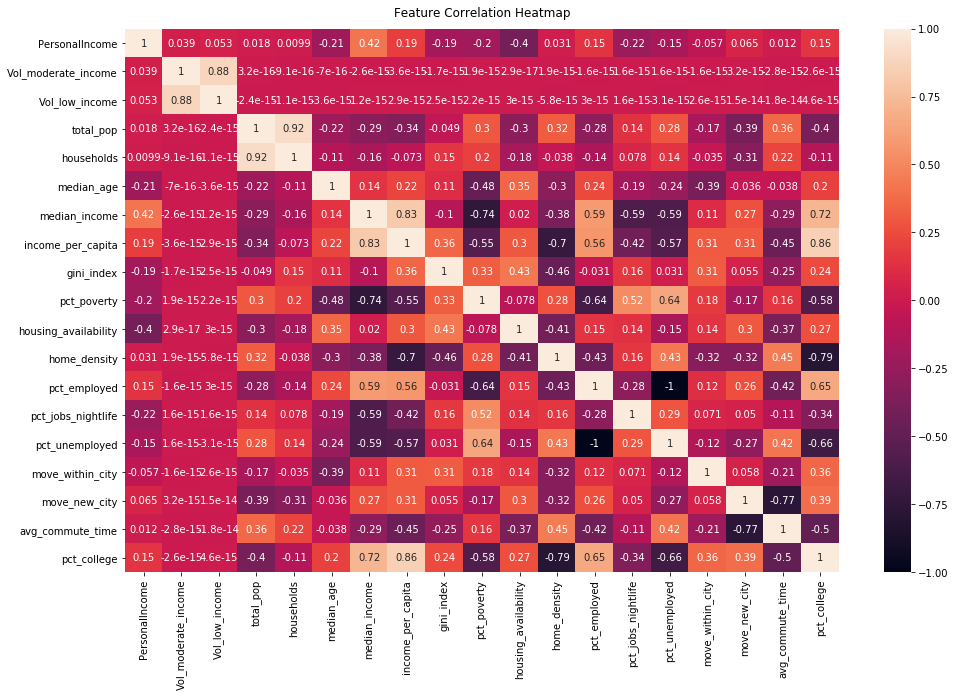

In [4]:
import seaborn as sns
# try a correlation heat map to assess for multicollinearity

plt.figure(figsize=(16, 10)) # larger for ease of viewing

heatmap = sns.heatmap(features.corr(), vmin=-1, vmax=1, annot=True)
# vmin/vmax are for the -1 to 1 on legend; annot=True lists corr vals in squares
heatmap.set_title('Feature Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [5]:
# removing a few feats that don't seem to be correlated:
# pct employed vs unemployed -> we only need to have the unemployed column (1-unemployed = employed)
# low/moderate income -> only really correlated with one another

df = features.drop(['Vol_moderate_income','Vol_low_income','pct_employed'],axis=1)

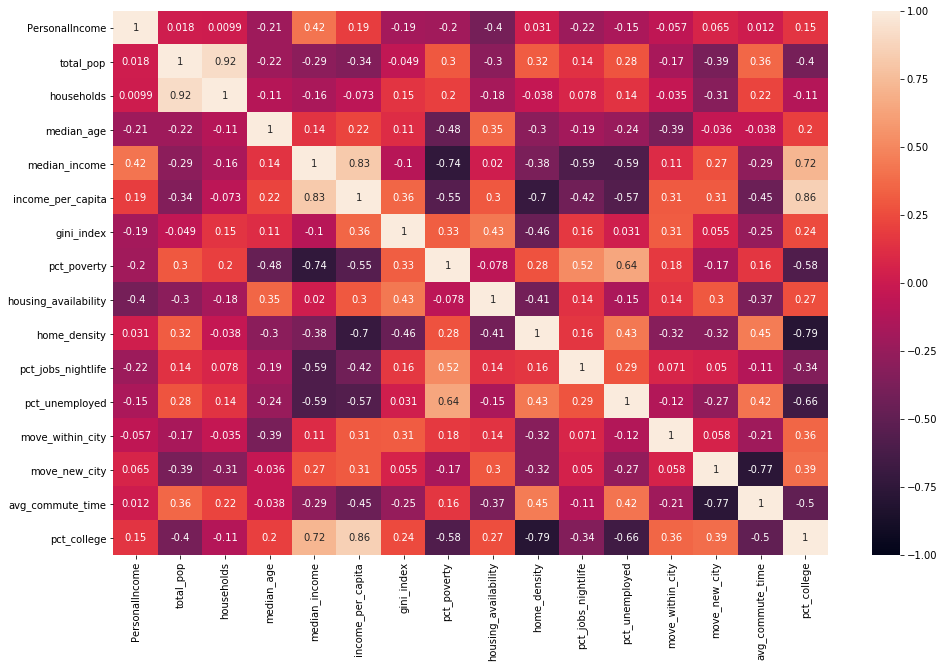

In [6]:
plt.figure(figsize=(16,10)) # larger for ease of viewing

#heatmap = sns.heatmap(features.corr(), vmin=-1, vmax=1, annot=True)
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

# trying a subset

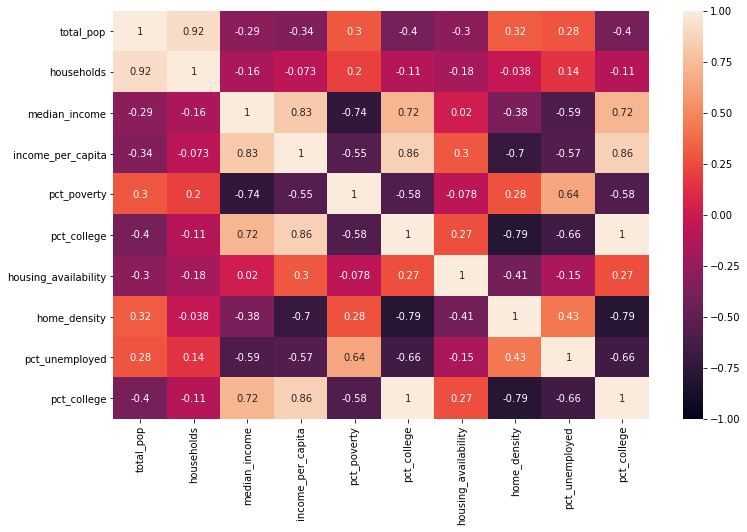

In [7]:
plt.figure(figsize=(12,7.5))
housing_feats = df[['total_pop','households','median_income','income_per_capita','pct_poverty','pct_college','housing_availability',
           'home_density','pct_unemployed','pct_college']]
sns.heatmap(housing_feats.corr(),vmin=-1, vmax=1, annot=True)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10) # 10 features
pca.fit(housing_feats)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
pca.explained_variance_ratio_

array([7.19522433e-01, 2.15154523e-01, 6.36455663e-02, 1.67747749e-03,
       2.09068137e-11, 4.95272268e-12, 1.40587841e-12, 8.11436166e-13,
       1.39680453e-13, 5.50647434e-43])

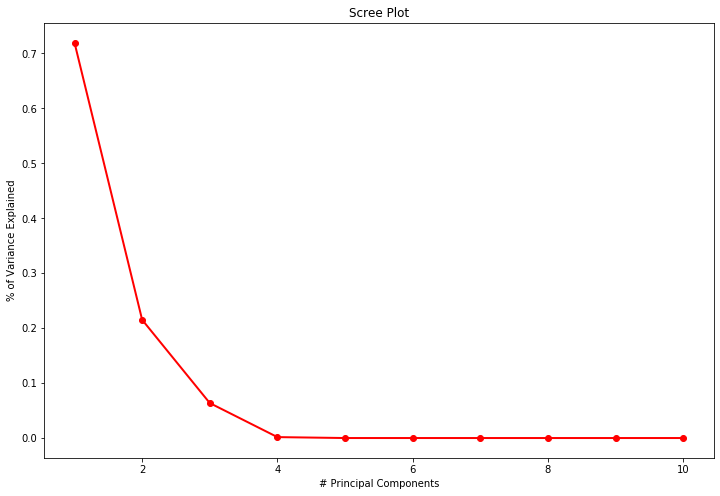

In [10]:
plt.figure(figsize=(12, 8))
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('# Principal Components')
plt.ylabel('% of Variance Explained')
plt.show() # we should use 3 principal components

In [11]:
pca.set_params(n_components=3)
pca.fit(housing_feats)
housing_pca = pca.transform(housing_feats)

Text(0, 0.5, 'PC 2')

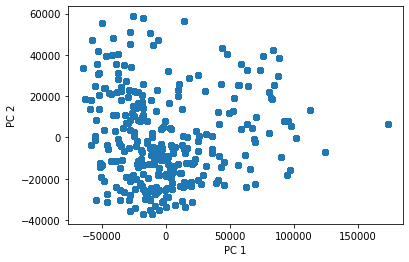

In [13]:
plt.scatter(housing_pca[:,0],housing_pca[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')

Text(0, 0.5, 'PC 3')

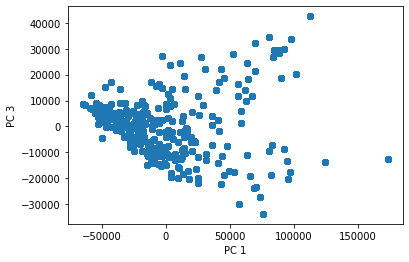

In [14]:
plt.scatter(housing_pca[:,0],housing_pca[:,2])
plt.xlabel('PC 1')
plt.ylabel('PC 3')

Text(0, 0.5, 'PC 3')

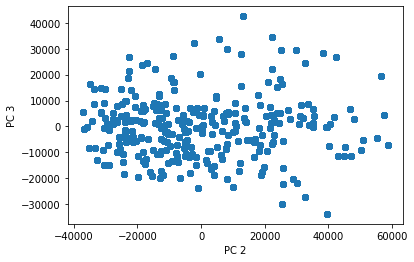

In [15]:
plt.scatter(housing_pca[:,1],housing_pca[:,2])
plt.xlabel('PC 2')
plt.ylabel('PC 3')